# ACTIVIDAD 1 Sugeno

1. Cargar el conjunto de datos de alguna de las señales de VDA que se ofrecen a continuación y graficarlo.

2. Entrenar diferentes modelos de Sugeno con todos ellos, variando la cantidad de reglas R (O el parámetro de radio de vecindad del clustering sustractivo, si corresponde). Graficar el error cuadrático medio (MSE) vs. R.

3. Elegir uno de los modelos según la mejor relación entre R y el MSE obtenido.

4. Sobremuestrear la señal, barriendo la variable de entrada para tener muchos más valores de muestras que con los datos originales y utilizando el modelo de Sugeno seleccionado.

Nota: Las señales de Variación de Diámetro Arterial fueron muestreadas con una frecuencia de 400 Hz. Es posible graduar así un eje temporal en segundos. El intervalo entre muestras sería de 1/400 s = 2.5ms.

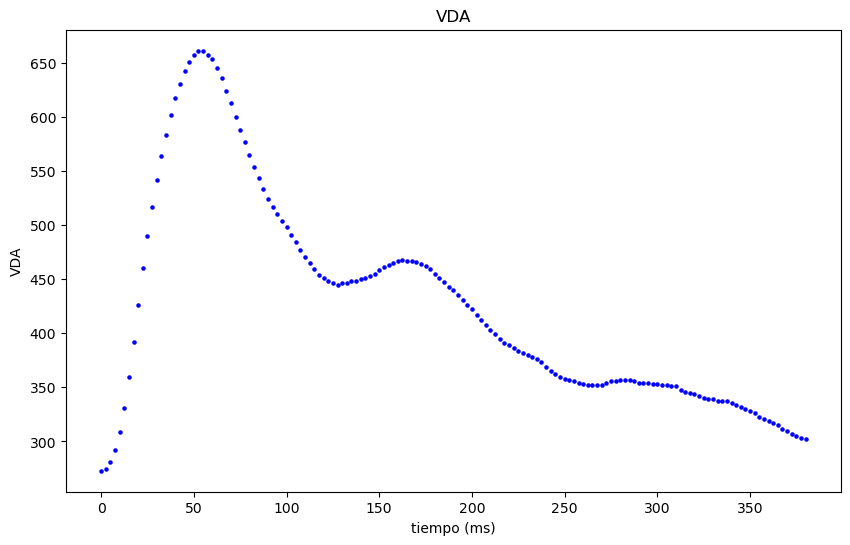

In [7]:
from importlib import reload  # Esto es necesario en algunos casos para recargar módulos
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import sugeno
reload(sugeno)

#Leer data de txt
y = []
with open("samplesVDA3.txt", 'r') as file:
    for line in file:
        number = float(line.strip())  # Convertir el texto a un número flotante
        y.append(number)
x = np.arange(0, len(y) * 2.5, 2.5)
data = np.column_stack((x,y))

def graficar(dat):
    plt.figure(figsize=(10,6))
    # Extraer las coordenadas x e y por separado
    x_coords = dat[:, 0]
    y_coords = dat[:, 1]
    # Graficar los puntos
    plt.scatter(x_coords, y_coords, color='blue', marker='o', s=5)
    # Etiquetas y título
    plt.xlabel('tiempo (ms)')
    plt.ylabel('VDA')
    plt.title('VDA')
    # Mostrar la gráfica
    plt.show()

graficar(data)

--- 0.020081281661987305 seconds ---
nivel acti
[[0.26165715 0.81861736 0.02496094 0.93309144 1.         0.9915525 ]
 [0.2697061  0.82816839 0.02625071 0.93941306 0.99982688 0.9937867 ]
 [0.2779064  0.83754078 0.02759757 0.94545009 0.99930772 0.9956811 ]
 [0.28625689 0.84672601 0.02900348 0.95119649 0.99844304 0.99723375]
 [0.29475622 0.85571562 0.03047047 0.95664651 0.99723375 0.99844304]
 [0.30340282 0.86450128 0.03200058 0.96179467 0.9956811  0.99930772]
 [0.31219496 0.87307478 0.03359588 0.96663577 0.9937867  0.99982688]
 [0.32113066 0.88142804 0.03525851 0.9711649  0.9915525  1.        ]
 [0.33020776 0.88955316 0.0369906  0.97537746 0.98898083 0.99982688]
 [0.33942389 0.89744237 0.03879435 0.97926915 0.98607433 0.99930772]
 [0.34877645 0.9050881  0.04067197 0.98283599 0.98283599 0.99844304]
 [0.35826264 0.91248296 0.04262571 0.98607433 0.97926915 0.99723375]
 [0.36787944 0.91961975 0.04465782 0.98898083 0.97537746 0.9956811 ]
 [0.3776236  0.92649149 0.04677062 0.9915525  0.9711649

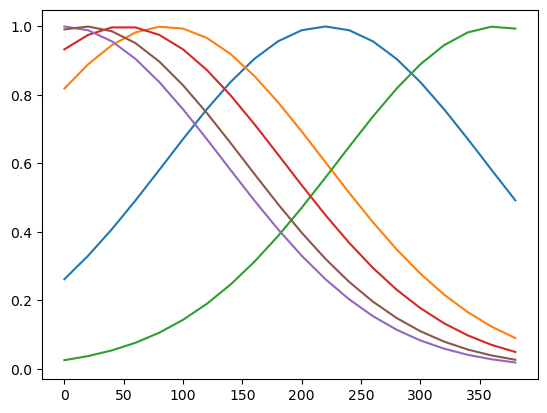

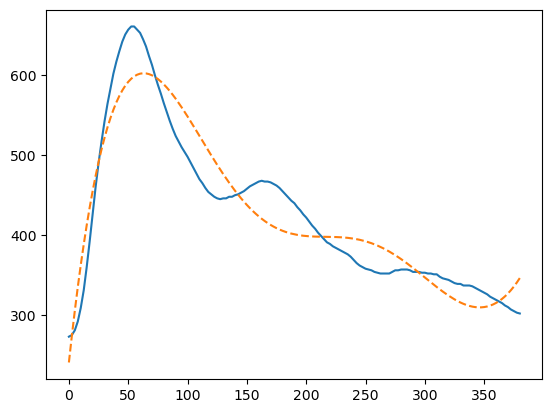

In [33]:
data_x = data[:, 0]
data_y = data[:, 1]

fis2 = sugeno.fis()
#data, Ra, Rb
fis2.genfis(data, 0.7, 0.8)
fis2.viewInputs()
r = fis2.evalfis(np.vstack(data_x))

plt.figure()
plt.plot(data_x,data_y)
plt.plot(data_x,r,linestyle='--')
fis2.solutions
fis2.rules

print("reglas")
print(len(fis2.rules))


print("mse = ", mean_squared_error(data_y, r))


In [ ]:
data_x = data[:, 0]
data_y = data[:, 1]
fis2 = sugeno.fis()
r_vs_mse = []

def apply_sugeno(Ra, Rb):
    #data, Ra, Rb
    fis2.genfis(data, Ra, Rb)
    #fis2.viewInputs()
    r = fis2.evalfis(np.vstack(data_x))
    #cantidad de reglas
    len(fis2.rules)
    #

print("reglas")
print(len(fis2.rules))


print("mse = ", mean_squared_error(data_y, r))




#iterar para diferentes valores de Ra y Rb

#separar datos por ejes x e y
data_x = data[:, 0]
data_y = data[:, 1]

fis2 = sugeno.fis()

#Valores Ra y Rb
#(1, 1.1) => 3 reglas
#(0.7, 0.9) => 4 reglas
#(0.65, 0.85) => 5 reglas
#(0.7, 0.8) => 6 reglas
#(0.5, 0.6) => 7 reglas
#
#
#(0.3, 0.4) => 10 reglas
#(0.4, 0.45) => 11 reglas

pares_xy = np.array([[0.3, 0.5],[0.5, 0.6],[5, 6], [], []])

#data, Ra, Rb
fis2.genfis(data, 0.5, 0.6)
#fis2.viewInputs()
r = fis2.evalfis(np.vstack(data_x))

plt.figure()
plt.plot(data_x,data_y)
plt.plot(data_x,r,linestyle='--')

#fis2.solutions
#fis2.rules


print("mse = ", mean_squared_error(data_y, r))









array([[280. ],
       [147.5],
       [ 40. ],
       [380. ],
       [  7.5],
       [ 87.5],
       [ 27.5]])

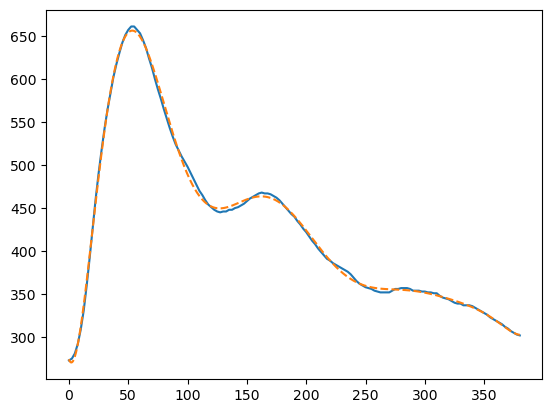

In [6]:
#Sobremuestrear señal
data_x2 = np.arange(0, x[-1] + 0.5, 0.5)

#evaluar señal sobremuestreada
r2 = fis2.evalfis(np.vstack(data_x2))

#Graficar original vs sobremuestreado
plt.figure()
plt.plot(data_x,data_y)
plt.plot(data_x2,r2,linestyle='--')
fis2.solutions
fis2.rules